In [1]:
from typing import TypedDict

from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):

    num1: int

    operation: str

    num2: int

    finalnum: int

    num3: int

    operation2: str

    num4: int

    finalnum2: int

In [3]:
def adder(state: AgentState) -> AgentState:

    """This node adds the two numbers"""

    state["finalnum"] = state["num1"] + state["num2"]

    return state

In [4]:
def subtractor(state: AgentState) -> AgentState:

    """This node subtracts the two numbers"""

    state["finalnum"] = state["num1"] - state["num2"]

    return state

In [5]:
def decide_next_node(state: AgentState) -> AgentState:

    """This node will select the next node of the graph"""

    if state["operation"] == "+":

        return "addition_operation"
    
    elif state["operation"] == "-":

        return "subtraction_operation"

In [6]:
def adder2(state: AgentState) -> AgentState:

    """This node adds the two numbers"""

    state["finalnum2"] = state["num3"] + state["num4"]

    return state

In [7]:
def subtractor2(state: AgentState) -> AgentState:

    """This node subtracts the two numbers"""

    state["finalnum2"] = state["num3"] - state["num4"]

    return state

In [8]:
def decide_next_node2(state: AgentState) -> AgentState:

    """This node will select the next node of the graph"""

    if state["operation"] == "+":

        return "addition_operation2"
    
    elif state["operation"] == "-":

        return "subtraction_operation2"

In [9]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)

graph.add_node("subtract_node", subtractor)

graph.add_node("router", lambda state:state) 

graph.add_node("add_node2", adder2)

graph.add_node("subtract_node2", subtractor2)

graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,

    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", "router2")

graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,

    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)

graph.add_edge("subtract_node2", END)

app = graph.compile()

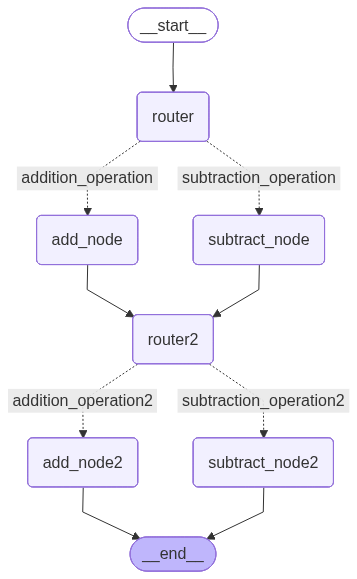

In [10]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
initial_state = AgentState(num1 = 10, operation = "-", num2 = 5, num3 = 7, num4 = 2, operation2 = "+", finalNum = 0, finalNum2 = 0)
print(app.invoke(initial_state))

{'num1': 10, 'operation': '-', 'num2': 5, 'finalnum': 5, 'num3': 7, 'operation2': '+', 'num4': 2, 'finalnum2': 5}
